# <br><br><span style="color:rebeccapurple">Overview</span>

Decision tree is an important type of model in machine learning. The model is relatively easy to understand, interpret and visualize.
    
Decision tree typically consists of decision nodes and leaf nodes. Each decision node takes a single feature, determine a decision rule based on this feature and separate the samples accordingly. Each leaf (or terminal) node represents an outcome or prediction. 

<div>
<center><img src="dt.png" width="500"/>
</div>
<center> Source: <a href="https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1">Sanjeevi, M (2017)</a>
    
The figure above is an example of a decision tree that is used to determine whether a person would go and play outside, based on 3 features - outlook, humidity and wind.

# <br><br><span style="color:rebeccapurple">Tree building algorithm</span>

Building a decision tree is essentially a process of dividing up the dataset and involves
- picking which feature to split the samples on
- determining the specific split point of the chosen feature

The numerical procedure can be summarized as tesing all possible split points corresponding to each feature using some cost functions. Whichever set of {feature, split point} produces the lowest cost is selected and the samples are split accordingly. 

There are several algorithms to build decision trees such as Iterative Dichotomiser 3 (ID3) and Classification and Regression Trees (CART). We will focus on CART for this workshop. 

The key features of CART are
- building binary trees, i.e., splitting samples in a decision node into 2 branches
- supporting numerical target variable (regression)
- sum of squared error as the cost function for regression
- Gini Index as the cost function for classification

##### Note: scikit-learn implementation does not support categorical predictors.

# <br><br><span style="color:rebeccapurple">Classification - Gini Index</span>

Gini Index (or Impurity) calculates the probaility of misclassifying samples based on a specific feature. The Gini Index function is calculated as
$$
\begin{align}
G = \sum_{i=1}^N p_i(1-p_i)
\end{align}
$$
where $p_i$ denotes the probability of a sample being classified for class $i$ and is calculated as 
$$
\begin{align}
p_i = \frac{\text{# samples in class $i$}}{\text{Total # samples}}
\end{align}
$$

Example: Suppose we have $N$ samples that belong to either class A or class B. We want to determine the first decision node and we want to test feature Income with split point $50,000. 
<div>
<center><img src="dt_example.png" width="600"/>
</div>
<center> Source: Author
    
    
<br> $p_a$ and $p_b$ are the probability of a sample being in class a and b respectively and they are calculated for each subset obtained after the split. We can compute the Gini Index for each subset, $G_1$ and $G_2$.

The Gini Index of a node is computed as the weighted score of these two subsets
$$
\begin{align}
G_{node} = G_1 \frac{N_1}{N} +  G_2 \frac{N_2}{N}
\end{align}
$$

This score is computed for each set of possible (feature, split point) and the one yielding the lowest value would be selected. After that, the procedure is repeated until we satisfy some kind of stopping criterion 

# <br><br><span style="color:rebeccapurple">Stopping criterion</span>

The most common stopping criterion is a minimum count on the number of instances assigned to each leaf node. If after splitting, the count is less than some number then the split is not accepted and the node is taken as a final leaf node.

If this number is too low (e.g. 1), the tree will likely overfit to the data and not generalize well. This number should be tuned to the dataset. We will not cover tuning hyperparameters in this workshop.

# <br><br><span style="color:rebeccapurple">Let's code!</span>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [29]:
df = pd.read_csv('datasets/iris.csv')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,149.000000,149.000000,150.000000
mean,5.843333,3.053691,3.773154,1.199333
std,0.828066,0.435040,1.761435,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# Get the feature columns for easier access
feature_names = df.columns.values[:-1]
# Split the dataset into predictors and response
X = df[feature_names]
Y = df['target']

In [36]:
# Transform the target into numerical values - Note: preprocessor in Pipeline is applied to predictors only, not target
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(Y)
labels = enc.classes_
Y_num = enc.transform(Y)
print(labels)

['setosa' 'versicolor' 'virginica']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_num, test_size=0.2, random_state=0)

In [38]:
df[df.isna().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,target
4,5.0,NaN,1.4,0.2,setosa
10,5.4,3.7,NaN,0.2,setosa


In [31]:
# Create preprocessor pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preprocessor = Pipeline(steps=[('nan', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeClassifier())])

In [33]:
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('nan', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('regressor', DecisionTreeClassifier())])

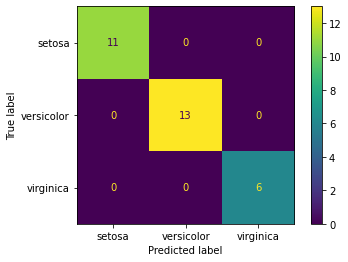

In [34]:
cm = confusion_matrix(Y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()